In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jax

/tmp/ipykernel_234370/4285129793.py:8: RuntimeWarning: divide by zero encountered in log
  return x / (1 + np.exp(-100 * (np.log(x/t))))
/tmp/ipykernel_234370/4285129793.py:8: RuntimeWarning: overflow encountered in exp
  return x / (1 + np.exp(-100 * (np.log(x/t))))


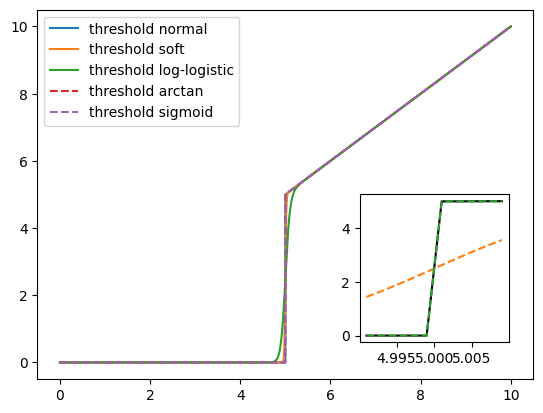

In [8]:
def threshold(x, t):
    return np.where(x - t < 0, 0, x)

def threshold_soft(x, t):
    return x / (1 + np.exp(-100 * (x - t)))

def threshold_loglogistic(x, t):
    return x / (1 + np.exp(-100 * (np.log(x/t))))

def threshold_arctan(x, t):
    return x * (0.5 + (1 / np.pi) * np.arctan(1e6 * (x - t)))

def threshold_sigmoid_nn(x, t):
    return x * jax.nn.sigmoid(1000 * (x - t))

n = 5000
ivl = 5
x = np.linspace(0, 10, n)
t = 5
c = int(n/2)

thresh_norm = threshold(x, t)
thresh_soft = threshold_soft(x, t)
thresh_loglogistic = threshold_loglogistic(x, t)
thresh_arctan = threshold_arctan(x, t)
thresh_sigmoid = threshold_sigmoid_nn(x, t)

fig, ax = plt.subplots(1, 1)
ax.plot(x, thresh_norm, label="threshold normal")
ax.plot(x, thresh_soft, label="threshold soft")
ax.plot(x, thresh_loglogistic, label="threshold log-logistic")
ax.plot(x, thresh_arctan, ls="--", label="threshold arctan")
ax.plot(x, thresh_sigmoid, ls="--", label="threshold sigmoid")
ax.legend()

axi = ax.inset_axes(bounds=[0.65, 0.1,.3,.4])
axi.plot(x[c-ivl:c+ivl], thresh_norm[c-ivl:c+ivl], ls="-", color="black")
axi.plot(x[c-ivl:c+ivl], thresh_soft[c-ivl:c+ivl], ls="--", color="tab:orange")
axi.plot(x[c-ivl:c+ivl], thresh_arctan[c-ivl:c+ivl], ls="--", color="tab:green")

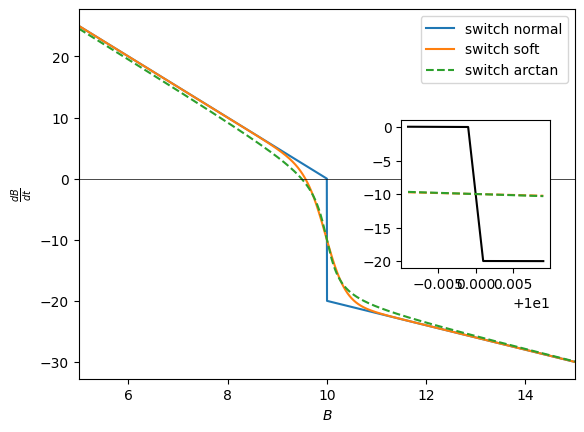

In [3]:
def switch(x, C, k_e, eta):
    return np.where(C >= x, eta * (C-x), - k_e * x)

def switch_soft(x, C, k_e, eta):
    pos = eta * (C-x)
    neg = - k_e * x
    return neg + (pos - neg) / (1 + 1 / np.exp(pos))

def switch_arctan(x, C, k_e, eta):
    pos = eta * (C-x)
    neg = - k_e * x
    return neg + (pos - neg) * (0.5 + (1 / np.pi) * np.arctan(pos))

n = 5000
ivl = 5
x = np.linspace(5, 15, n)
c = int(n/2)

# params
eta = 5
C = 10
k_e = 2

sw_norm = switch(x, C, k_e, eta)
sw_soft = switch_soft(x, C, k_e, eta)
sw_arctan = switch_arctan(x, C, k_e, eta)

fig, ax = plt.subplots(1, 1)
ax.plot(x, sw_norm, label="switch normal")
ax.plot(x, sw_soft, label="switch soft")
ax.plot(x, sw_arctan, ls="--", label="switch arctan")

ax.legend()
ax.set_ylabel(f"$\\frac{{dB}}{{dt}}$")
ax.set_xlabel(f"$B$")
ax.hlines(0, 5, 15, lw=.5, color="black")
ax.set_xlim(5, 15)

axi = ax.inset_axes(bounds=[0.65, 0.3,.3,.4])
axi.plot(x[c-ivl:c+ivl], sw_norm[c-ivl:c+ivl], ls="-", color="black")
axi.plot(x[c-ivl:c+ivl], sw_soft[c-ivl:c+ivl], ls="--", color="tab:orange")
axi.plot(x[c-ivl:c+ivl], sw_arctan[c-ivl:c+ivl], ls="--", color="tab:green")